In [44]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('./pull2.csv')
data_train.head()#展示头部数据

,time1,cali1,time2,cali2
0,17:57:53,-220.32,17:57:53,4.46
1,17:57:53,-220.34,17:57:53,4.47
2,17:57:53,-220.36,17:57:53,4.49
3,17:57:53,-220.34,17:57:53,4.44
4,17:57:53,-220.30,17:57:53,4.44


In [45]:
# Convert the time columns to a datetime format
data_train['time1'] = pd.to_datetime(data_train['time1'])
data_train['time2'] = pd.to_datetime(data_train['time2'])

# Set the time columns as the index of each series
cali1 = data_train.set_index('time1')['cali1']
cali2 = data_train.set_index('time2')['cali2']

# Downsample cali1
cali1_resampled = cali1.resample('100ms').mean() # Adjust '100ms' to match your desired frequency

# Align the series and fill any missing values with forward fill
cali1_aligned, cali2_aligned = cali1_resampled.align(cali2, method='ffill')

C:\Users\1124162103\AppData\Local\Temp\ipykernel_7008\1377572022.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train['time1'] = pd.to_datetime(data_train['time1'])
C:\Users\1124162103\AppData\Local\Temp\ipykernel_7008\1377572022.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_train['time2'] = pd.to_datetime(data_train['time2'])


In [46]:
X_train =  cali1_aligned
y_train =  cali2_aligned

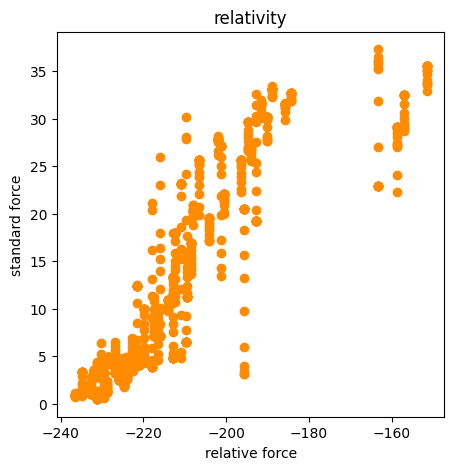

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train,c='darkorange')
plt.title('relativity')
plt.xlabel('relative force')
plt.ylabel('standard force')
plt.show()
X_train = np.array(X_train).reshape(-1,1)

In [48]:
from sklearn.linear_model import  LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

LinearRegression()

In [49]:
data_test = pd.read_csv('./pull1.csv')
X_test = cali1_aligned
y_test = cali2_aligned
X_test = np.array(X_test).reshape(-1 ,1)
print(X_test.shape)

(80993, 1)


In [50]:
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_absolute_error
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
e1 = mean_absolute_error(y_train,y_train_predict)
e2 = mean_absolute_error(y_test,y_test_predict)
print('training r2:',r2_train)
print('test r2:',r2_test)
print(e1)
print(e2)
print(lr1.coef_)
print(lr1.intercept_)

training r2: 0.8396966747869956
test r2: 0.8396966747869956
0.08318940122464902
0.08318940122464902
[0.55108964]
127.6825525277755


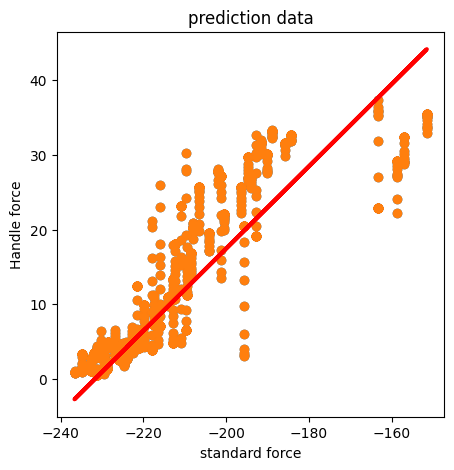

In [51]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_test,y_test_predict,linewidth = '3', label = "test", color='red')
plt.scatter(X_train,y_train)
plt.scatter(X_test, y_test)

plt.title('prediction data')
plt.xlabel('standard force')
plt.ylabel('Handle force')
plt.show()